<div style="border-top: 3px solid #0a6d91; padding: 15px; display: flex; align-items: center; justify-content: space-between;">

  <!-- Left text -->
  <div style="flex: 1; padding-right: 20px;">
    <h1 style= display: inline-block; padding: 5px 10px; border-radius: 3px;">
      Mutual Information Dynamics <br> in VAEs
    </h1>
    <h3>Information theory and inference</h3>
  </div>

  <!-- Right images -->
  <div style="flex: 0 0 auto; display: flex; align-items: center; gap: 20px;">
    <img src="https://th.bing.com/th/id/R.f158dd00f7e0e326ff081cf1acb39901?rik=tfJW%2frH3keCJ%2fg&riu=http%3a%2f%2fboostlab.dfa.unipd.it%2fimg%2flogo_pod.png&ehk=Th6GDiUuQTgD%2faBhIK7JUi15%2bG%2f35LzMJV9PFEPd9rg%3d&risl=&pid=ImgRaw&r=0" alt="PoD" width="250"/>
    <img src="https://www.unidformazione.com/wp-content/uploads/2018/04/unipd-universita-di-padova-1024x463.png" alt="UNIPD" width = "350" />
  </div>

</div>
<div style="border-bottom: 1px solid #0a6d91">
  <p><strong>Authors</strong></p>
  <table style="border-collapse: collapse; display: inline-table;">
    <tr>
      <td style="padding: 1px;">Boscolo Marco</td>
      <td style="padding: 1px;">2157559</td>
    </tr>
    <tr>
      <td style="padding: 1px;">La Rovere Francesco</td>
      <td style="padding: 1px;">2164968</td>
    </tr>
    <tr>
      <td style="padding: 1px;">Montagner Nicolò</td>
      <td style="padding: 1px;">2165809</td>
    </tr>
    <tr>
      <td style="padding: 1px;">Sabatini Raffaele</td>
      <td style="padding: 1px;">2165739</td>
    </tr>
  </table>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from VariationalModel import *
from Functions import *
from Classes import *

In [27]:
generate_index(file="Restyle.ipynb")


<h1 style="color:black; font-size: 38px; font-weight: 700; margin-bottom: 5px;">
    Index
</h1>

<hr style="border: 1px solid #000;">

<p style="font-size: 18px; color:black; margin-top: 10px;">

</p>
<span style="font-size:20px; color:black; font-weight:700;">• <a href="#Introduction" style="color:black; text-decoration:none;">Introduction</a></span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="font-size:17px; color:black; font-weight:500;">◦ <a href="#Theoretical-Background" style="color:black; text-decoration:none;">Theoretical Background</a></span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="font-size:17px; color:black; font-weight:500;">◦ <a href="#General-Parameters-Setup" style="color:black; text-decoration:none;">General Parameters Setup</a></span><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="font-size:17px; color:black; font-weight:500;">◦ <a href="#Dataset-Description" style="color:black; text-decoration:none;">Dataset Description</a></span><br>
<span style="font-size:20px; color:black; font-weight:700;">• <a href="#General-set-up" style="color:black; text-decoration:none;">General set up</a></span><br>
<br>
<hr style="border: 1px solid #000;">
<br>


# 1. Introduction

## Theoretical Background  

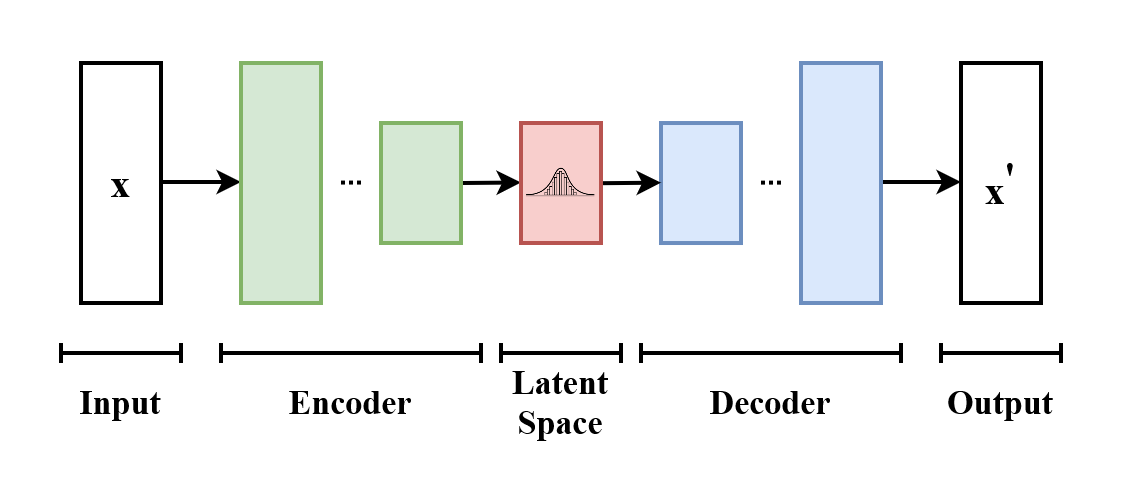

In [4]:
Image(filename="Images/VAE_Basic.png", width=600, height=500)

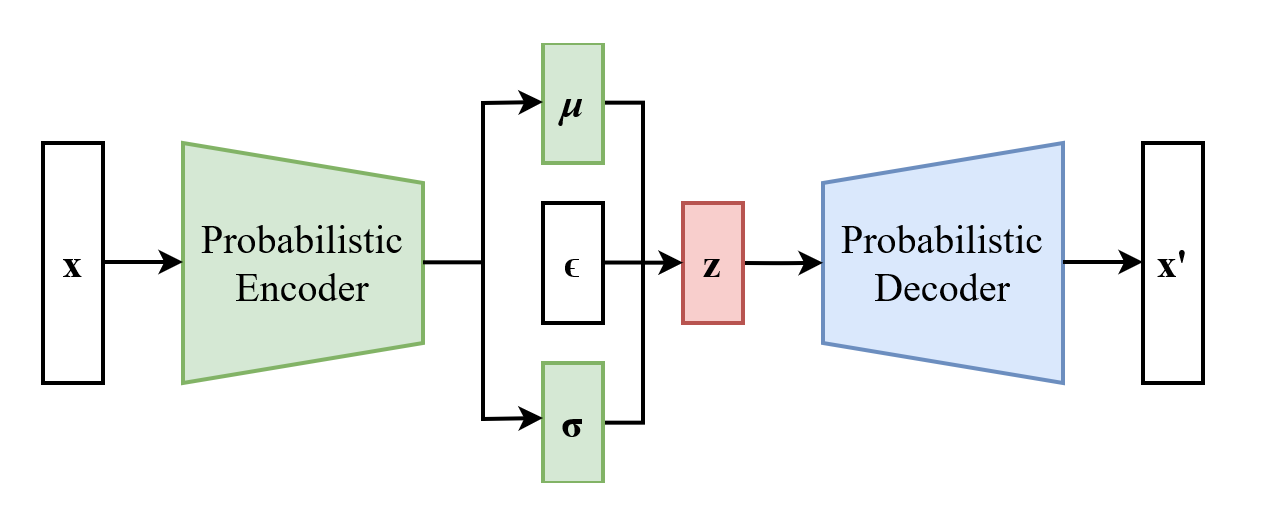

In [5]:
Image(filename="Images/Reparameterized_Variational_Autoencoder.png", width=600, height=500)

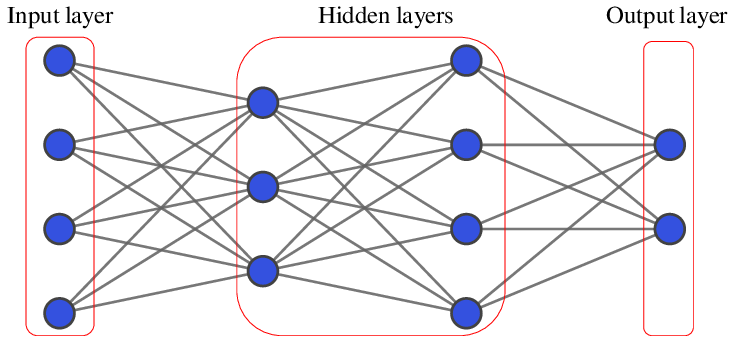

In [6]:
Image(filename="Images/FFNN.png", width=500, height=400)

## General Parameters Setup

In [7]:
binarize   = False
batch_size = 250

## Dataset Description

In [8]:
if torch.backends.mps.is_available():
   device = torch.device("mps")
elif torch.cuda.is_available():
   device = torch.device("cuda")
else:
   device = torch.device("cpu")

print(f'Selected device: {device}')

Selected device: cuda


In [9]:
dataDirectory = 'Dataset'

trainDataset = torchvision.datasets.MNIST(dataDirectory, train=True, download=True)
testDataset  = torchvision.datasets.MNIST(dataDirectory, train=False, download=True)
print(f"Length of the train dataset: {len(trainDataset)}")
print(f"Length of the test dataset: {len(testDataset)}")

Length of the train dataset: 60000
Length of the test dataset: 10000


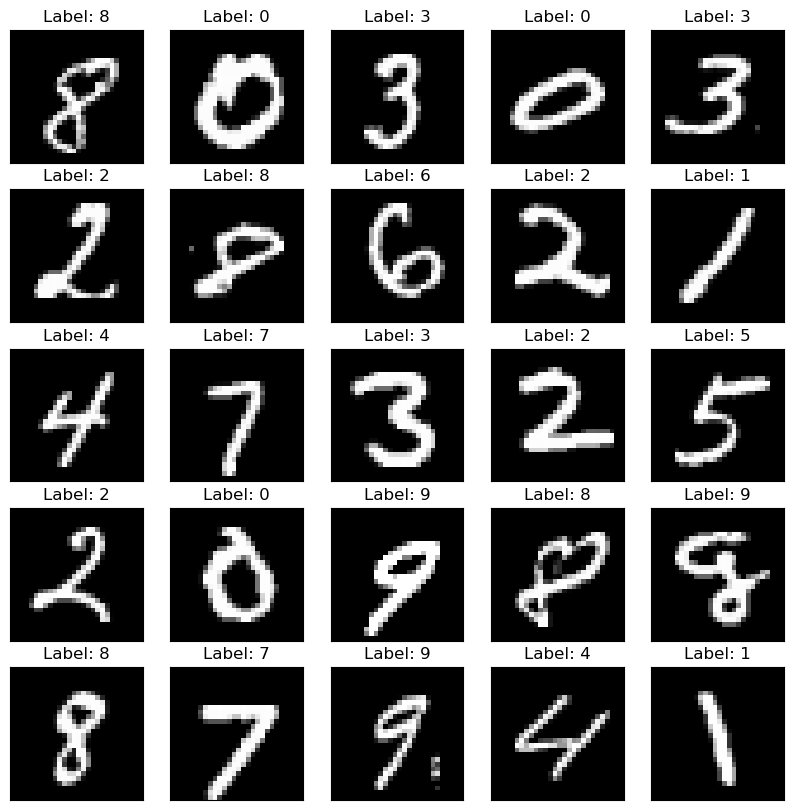

In [10]:
fig, axs = plt.subplots(5, 5, figsize = (10, 10))

for ax in axs.flatten():
   img, label = random.choice(trainDataset)
   ax.imshow(np.array(img), cmap = 'gist_gray')
   ax.set_title(f'Label: {label}')
   ax.set_xticks([])
   ax.set_yticks([])

In [11]:
#Transforms in pytorch tensors
operations = [transforms.ToTensor()]
if binarize:
    operations.append( transforms.Lambda(lambda x: (x > 0.5).float()) )

final_transform = transforms.Compose(operations)
trainDataset.transform = final_transform
testDataset.transform  = final_transform

In [12]:
#Define the Dataloader
trainDataloader = DataLoader(trainDataset, batch_size=batch_size, shuffle=True)
testDataloader = DataLoader(testDataset, batch_size=batch_size, shuffle=False)

batch_data, batch_labels = next(iter(trainDataloader))
print(f"TRAIN BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

batch_data, batch_labels = next(iter(testDataloader))
print(f"TEST BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

TRAIN BATCH SHAPE
	 Data: torch.Size([250, 1, 28, 28])
	 Labels: torch.Size([250])
TEST BATCH SHAPE
	 Data: torch.Size([250, 1, 28, 28])
	 Labels: torch.Size([250])


# 2. General set up

In [39]:
# class VAEAnalyzer:
#     """Namespace per le funzioni di analisi Robustezza Canale (Parte Nicolò)"""
    
#     @staticmethod
#     def gaussian_noise(z, std): return z + torch.randn_like(z) * std

#     @staticmethod
#     def compare_channel_performance(model, dataset, device, noise_func=None, params=[0.5], num_samples=1000, renorm=True):
#         """Confronta MSE: Trasmissione Latente vs Trasmissione Diretta"""
#         noise_func = noise_func if noise_func else VAEAnalyzer.gaussian_noise
#         model.eval().to(device)
        
#         latent_mse, direct_mse = [], []
#         loader = torch.utils.data.DataLoader(dataset, batch_size=min(num_samples, 100), shuffle=True)
#         batches_needed = num_samples // loader.batch_size
        
#         with torch.no_grad():
#             for i, (x, _) in enumerate(loader):
#                 if i >= batches_needed: break
#                 x = x.to(device).view(x.size(0), -1)
                
#                 # A. Canale Latente (Encoder -> Noise -> Decoder)
#                 z, _, _ = model.Encoding(x)
#                 if renorm:
#                     scale = torch.max(z) + 1e-8
#                     z_noisy = noise_func(z / scale, *params) * scale
#                 else:
#                     z_noisy = noise_func(z, *params)
#                 x_rec = model.Decoding(z_noisy)
                
#                 # B. Canale Diretto (Image -> Noise)
#                 x_noisy_direct = noise_func(x, *params)
                
#                 # Calcolo metriche
#                 latent_mse.append(torch.mean((x - x_rec)**2, dim=1).cpu().numpy())
#                 direct_mse.append(torch.mean((x - x_noisy_direct)**2, dim=1).cpu().numpy())

#         l_mse = np.concatenate(latent_mse).mean()
#         d_mse = np.concatenate(direct_mse).mean()
        
#         print(f"\n=== Channel Robustness Analysis (Noise Param: {params}) ===")
#         print(f"Latent Channel MSE: {l_mse:.4f}")
#         print(f"Direct Channel MSE: {d_mse:.4f}")
#         print(f"Improvement: {((d_mse - l_mse) / d_mse * 100):.2f}% (Higher is better)")
#         return l_mse, d_mse


In [26]:
# # 3. Analisi "Channel Robustness" sul modello appena addestrato (quando c'è rumore
# print("\n >>> Analisi Robustezza Canale (Parte Nicolò) <<<")

# # Recuperiamo il modello addestrato
# trained_q_model = quant_results["Exp_Quantized_4bit"]["model"]

# # Eseguiamo il confronto (MSE Latente vs Diretto)
# VAEAnalyzer.compare_channel_performance(
#     model=trained_q_model,
#     dataset=testDataloader.dataset,
#     device=device,
#     noise_func=VAEAnalyzer.gaussian_noise, # o VAEAnalyzer.bitflip_noise
#     params=[0.3], # Deviazione Standard del rumore
#     renorm=True
# )

In [13]:
import torch
import torch.nn as nn
import torch.nn.utils.parametrize as parametrize
import torch.optim as optim
import numpy as np
from typing import Dict, Any, List, Optional, Callable

# ==========================================
# 1. NOISE FUNCTIONS & TOOLS
# ==========================================

def gaussian_noise(z: torch.Tensor, std: float) -> torch.Tensor:
    noise = torch.randn_like(z) * std
    noisy_z = z + noise
    return noisy_z

def bitflip_noise(z: torch.Tensor, p: float) -> torch.Tensor:
    # Flip probability p
    flip_mask = torch.rand_like(z) < p
    noisy_z = z.clone()
    noisy_z[flip_mask] = -noisy_z[flip_mask]
    return noisy_z

def deactivate_input_noise(z: torch.Tensor, p: float) -> torch.Tensor:
    # Dropout/Zeroing probability p
    deactivate_mask = torch.rand_like(z) < p
    noisy_z = z.clone()
    noisy_z[deactivate_mask] = 0.0
    return noisy_z

class BitwiseWeightQuantizer(nn.Module):
    """
    Simulates hardware quantization using Straight-Through Estimator (STE).
    Gradients flow through the un-quantized path during backprop.
    """
    def __init__(self, nBits=8):
        super().__init__()
        self.nBits = nBits
        self.q_min = -(2 ** (nBits - 1))
        self.q_max = (2 ** (nBits - 1)) - 1

    def forward(self, w):
        # 1. Scale factor based on max absolute value
        maxVal = torch.max(w.abs().max(), torch.tensor(1e-8, device=w.device))
        scale = maxVal / self.q_max
        
        # 2. Quantize (Round & Clamp)
        wInt = torch.clamp(torch.round(w / scale), self.q_min, self.q_max)
        
        # 3. Dequantize (Fake Quantization for Training)
        w_quant = wInt * scale
        
        # 4. STE Magic: Forward uses w_quant, Backward uses w
        return w + (w_quant - w).detach()

class ChannelAnalyzer:
    """
    Tools to compare Latent Space Transmission vs Direct Image Transmission
    under various noise conditions.
    """
    @staticmethod
    def compare_performance(model, dataset, device, noise_type="gaussian", param=0.5, num_samples=1000, renorm=True):
        """
        Runs the comparison and prints the MSE improvement.
        """
        # Select noise function
        noise_map = {
            "gaussian": gaussian_noise,
            "bitflip": bitflip_noise,
            "deactivate": deactivate_input_noise
        }
        noise_func = noise_map.get(noise_type, gaussian_noise)
        
        model.eval().to(device)
        latent_mse_list, direct_mse_list = [], []
        
        # Create a temporary loader for efficient batch processing
        loader = torch.utils.data.DataLoader(dataset, batch_size=min(num_samples, 100), shuffle=True)
        batches_needed = max(1, num_samples // loader.batch_size)
        
        print(f"\n--- Running Channel Analysis (Noise: {noise_type}, Param: {param}) ---")
        
        with torch.no_grad():
            for i, (x, _) in enumerate(loader):
                if i >= batches_needed: break
                
                # Flatten image: [Batch, 1, 28, 28] -> [Batch, 784]
                x = x.to(device).view(x.size(0), -1)
                
                # --- PATH A: Latent Channel Transmission ---
                # Encoder -> Z -> Noise -> Decoder
                z, _, _ = model.Encoding(x)
                
                # Optional: Renormalize Z to make noise relative to signal amplitude
                if renorm:
                    scale = torch.max(torch.abs(z)) + 1e-8
                    z_normalized = z / scale
                    z_noisy = noise_func(z_normalized, param) * scale
                else:
                    z_noisy = noise_func(z, param)
                    
                x_rec_latent = model.Decoding(z_noisy)
                
                # --- PATH B: Direct Channel Transmission ---
                # Image -> Noise
                x_noisy_direct = noise_func(x, param)
                
                # Calculate MSE for this batch
                # Axis 1 = sum over pixels, then mean over batch
                batch_mse_latent = torch.mean(torch.sum((x - x_rec_latent)**2, dim=1))
                batch_mse_direct = torch.mean(torch.sum((x - x_noisy_direct)**2, dim=1))
                
                latent_mse_list.append(batch_mse_latent.item())
                direct_mse_list.append(batch_mse_direct.item())

        # Aggregate results
        avg_latent_mse = np.mean(latent_mse_list)
        avg_direct_mse = np.mean(direct_mse_list)
        improvement = (avg_direct_mse - avg_latent_mse) / avg_direct_mse * 100
        
        print(f" > Direct Channel MSE: {avg_direct_mse:.4f}")
        print(f" > Latent Channel MSE: {avg_latent_mse:.4f}")
        print(f" > VAE Robustness Improvement: {improvement:.2f}%")
        
        return {"latent_mse": avg_latent_mse, "direct_mse": avg_direct_mse, "improvement": improvement}


# ==========================================
# 2. CONFIGURATION OBJECT
# ==========================================

class ExperimentConfig:
    def __init__(self, 
                 name: str, 
                 model_params: Dict[str, Any], 
                 train_params: Dict[str, Any], 
                 mi_params: Dict[str, Any],
                 quantization_params: Optional[Dict[str, Any]] = None,
                 channel_analysis_params: Optional[Dict[str, Any]] = None):
        """
        Configuration container for a single experiment.
        
        Args:
            name: Unique ID for the experiment.
            model_params: Dict passed to VariationalAutoEncoder (hidden_dims, etc.)
            train_params: Dict with 'lr', 'epochs'.
            mi_params: Dict with 'method' (kde/kraskov), 'sigma', 'n_neig'.
            quantization_params: (Optional) Dict with 'enabled': True, 'n_bits': 4.
            channel_analysis_params: (Optional) Dict to run noise analysis after training.
                                     Ex: {'noise_type': 'bitflip', 'param': 0.1}
        """
        self.name = name
        self.model_params = model_params
        self.train_params = train_params
        self.mi_params = mi_params
        self.quantization_params = quantization_params
        self.channel_analysis_params = channel_analysis_params


# ==========================================
# 3. THE FRAMEWORK (TRAINER)
# ==========================================

class VAEFramedTrainer:
    def __init__(self, train_loader, test_loader, device):
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.device = device

    def _apply_quantization(self, model, n_bits):
        """Internal helper to apply quantization wrapper to Linear layers."""
        print(f"   [System] Applying {n_bits}-bit quantization to model weights...")
        count = 0
        for name, module in model.named_modules():
            if isinstance(module, nn.Linear):
                # Clean up previous parametrizations if any
                if parametrize.is_parametrized(module, "weight"):
                    parametrize.remove_parametrizations(module, "weight")
                # Register the Quantizer
                parametrize.register_parametrization(module, "weight", BitwiseWeightQuantizer(n_bits))
                count += 1
        print(f"   [System] Quantized {count} layers.")

    def loss_function(self, x, x_hat, mean, logVar):
        # 1. Reconstruction (Binary Cross Entropy)
        reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
        # 2. KL Divergence
        KLD = -0.5 * torch.sum(1 + logVar - mean.pow(2) - logVar.exp())
        return reproduction_loss + KLD

    def run(self, config: ExperimentConfig):
        print(f"\n{'='*15} STARTING EXPERIMENT: {config.name} {'='*15}")
        
        # --- PHASE 1: INITIALIZATION ---
        # Initialize the model using the parameters dictionary
        model = VariationalAutoEncoder(**config.model_params).to(self.device)
        
        # Apply Quantization if requested in config
        if config.quantization_params and config.quantization_params.get("enabled"):
            self._apply_quantization(model, config.quantization_params.get("n_bits", 8))
        
        # Setup Optimizer
        lr = config.train_params.get("lr", 1e-3)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        # Setup Recorders & Estimators
        # (Assuming classes ActivationRecorder, MI_Estimator, MI_History exist in your context)
        recorder = ActivationRecorder()
        recorder.InitialRegister(model)
        
        mi_estimator = MI_Estimator(
            method=config.mi_params.get("method", "kmeans"),
            sigma=config.mi_params.get("sigma", 1.0),
            n_neig=config.mi_params.get("n_neig", 3)
        )
        mi_history = MI_History()
        
        # --- PHASE 2: TRAINING LOOP ---
        epochs = config.train_params.get("epochs", 20)
        model.train()
        
        for epoch in range(1, epochs + 1):
            train_loss = 0
            for batch_idx, (data, _) in enumerate(self.train_loader):
                # Flatten image [Batch, 1, 28, 28] -> [Batch, 784]
                data = data.to(self.device).view(data.size(0), -1)
                
                optimizer.zero_grad()
                
                # Forward Pass
                x_hat, z, mean, logVar = model(data)
                
                # Loss & Backward
                loss = self.loss_function(data, x_hat, mean, logVar)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
            
            avg_loss = train_loss / len(self.train_loader.dataset)
            print(f"[{config.name}] Epoch {epoch}/{epochs} | Loss: {avg_loss:.4f}")

            # Mutual Information Calculation (if VAE_info function is available)
            if "VAE_info" in globals():
                 mi_data = VAE_info(
                     model=model, 
                     dataset=self.test_loader.dataset, 
                     device=self.device, 
                     epoch=epoch, 
                     num_samples=1000, 
                     mi_estimator=mi_estimator, 
                     RecorderActivat=recorder
                 )
                 if mi_data: mi_history.append(mi_data)

        # --- PHASE 3: POST-TRAINING ANALYSIS (CHANNEL ROBUSTNESS) ---
        channel_results = None
        if config.channel_analysis_params:
            # Calls the ChannelAnalyzer tool defined above
            channel_results = ChannelAnalyzer.compare_performance(
                model=model,
                dataset=self.test_loader.dataset,
                device=self.device,
                noise_type=config.channel_analysis_params.get("noise_type", "gaussian"),
                param=config.channel_analysis_params.get("param", 0.5),
                renorm=True
            )

        print(f"{'='*15} EXPERIMENT COMPLETED: {config.name} {'='*15}\n")
        
        # Return all artifacts for further plotting/analysis
        return {
            "config": config,
            "model": model,
            "optimizer": optimizer,
            "recorder": recorder,
            "mi_history": mi_history,
            "channel_results": channel_results,
            "final_loss": avg_loss
        }

In [22]:
# 1. Initialize the Engine
trainer = VAEFramedTrainer(trainDataloader, testDataloader, device)

# 2. Define Experiments using standard Class (Simple!)
experiments_list = [
    
    # CASE A: Simple Model (Just Training)
    ExperimentConfig(
        name="Baseline_Model",
        model_params={"inputDim": 784, "hiddenDim": [400,200], "latentDim": 20, 
            "temperature": 1.0, "binarize": "no"},
        train_params={"lr": 1e-3, "epochs": 3},
        mi_params={"method": "kde", "sigma": 1},
        # No quantization, No channel analysis
        quantization_params=None,
        channel_analysis_params=None
    ),

    # CASE B: Quantized Model + Noise Analysis
    ExperimentConfig(
        name="Quantized_4bit_Bitflip",
        model_params={"inputDim": 784, "hiddenDim": [400,200], "latentDim": 20, 
            "temperature": 1.0, "binarize": "no"},
        train_params={"lr": 1e-3, "epochs": 3},
        mi_params={"method": "kde", "sigma": 1},
        
        # Enable Quantization (4-bit)
        quantization_params={"enabled": True, "n_bits": 4},
        
        # Enable Noise Analysis (Check robustness against Bitflips)
        channel_analysis_params={"noise_type": "bitflip", "param": 0.1}
    )
]

# 3. Run Batch
results_db = {}
for exp in experiments_list:
    results_db[exp.name] = trainer.run(exp)

# Access comparison results for the second experiment
# print(results_db["Quantized_4bit_Bitflip"]["channel_results"])


=============== STARTING EXPERIMENT: Baseline_Model ===============
[Baseline_Model] Epoch 1/3 | Loss: 202.7769
[Baseline_Model] Epoch 2/3 | Loss: 148.9469
[Baseline_Model] Epoch 3/3 | Loss: 130.1918
=============== EXPERIMENT COMPLETED: Baseline_Model ===============


=============== STARTING EXPERIMENT: Quantized_4bit_Bitflip ===============
   [System] Applying 4-bit quantization to model weights...
   [System] Quantized 7 layers.
[Quantized_4bit_Bitflip] Epoch 1/3 | Loss: 201.8625
[Quantized_4bit_Bitflip] Epoch 2/3 | Loss: 148.8756
[Quantized_4bit_Bitflip] Epoch 3/3 | Loss: 132.6427

--- Running Channel Analysis (Noise: bitflip, Param: 0.1) ---
 > Direct Channel MSE: 35.5561
 > Latent Channel MSE: 35.4766
 > VAE Robustness Improvement: 0.22%
=============== EXPERIMENT COMPLETED: Quantized_4bit_Bitflip ===============



In [23]:
results_db["Quantized_4bit_Bitflip"]

{'config': <__main__.ExperimentConfig at 0x76ddf3cc67e0>,
 'model': VariationalAutoEncoder(
   (InputSpace): Identity()
   (Encoder): Sequential(
     (0): Sequential(
       (0): ParametrizedLinear(
         in_features=784, out_features=400, bias=True
         (parametrizations): ModuleDict(
           (weight): ParametrizationList(
             (0): BitwiseWeightQuantizer()
           )
         )
       )
       (1): ReLU()
     )
     (1): Sequential(
       (0): ParametrizedLinear(
         in_features=400, out_features=200, bias=True
         (parametrizations): ModuleDict(
           (weight): ParametrizationList(
             (0): BitwiseWeightQuantizer()
           )
         )
       )
       (1): ReLU()
     )
   )
   (LatentLayerMu): ParametrizedLinear(
     in_features=200, out_features=20, bias=True
     (parametrizations): ModuleDict(
       (weight): ParametrizationList(
         (0): BitwiseWeightQuantizer()
       )
     )
   )
   (LatentLayerSigma): ParametrizedLine

In [24]:
mi_variable = results_db["Quantized_4bit_Bitflip"]["mi_history"]

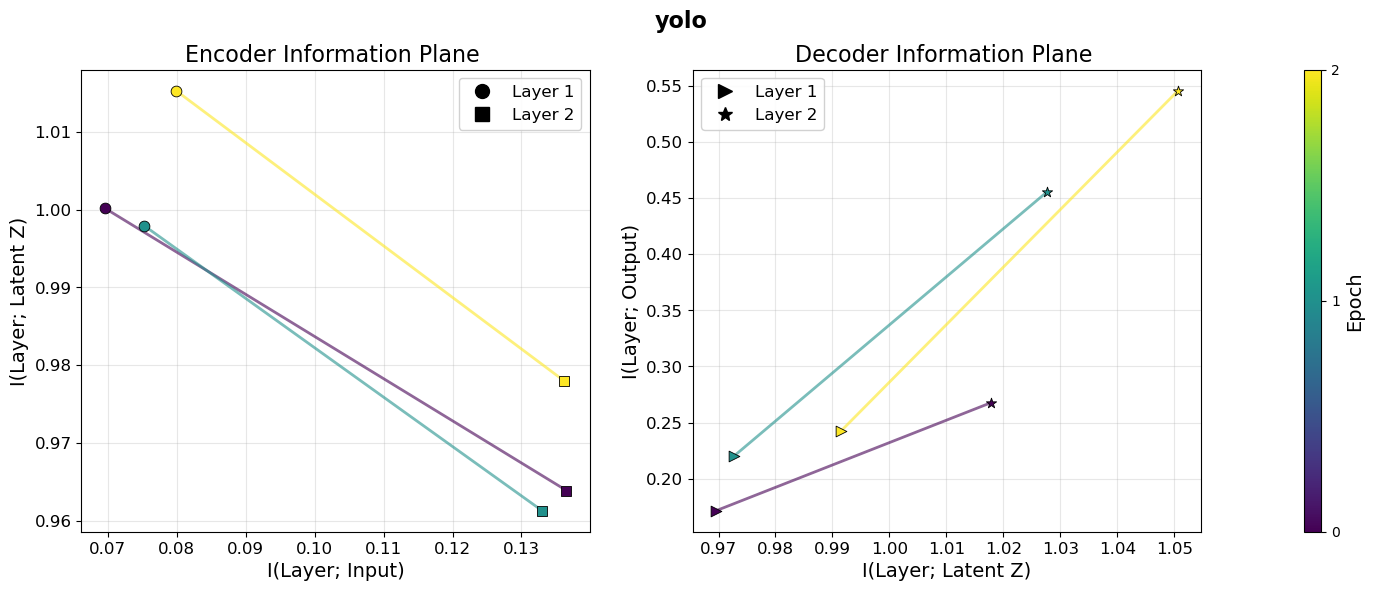

In [25]:
PlotInfoPlane(mi_variable.encoder, mi_variable.decoder, start_epoch=0, end_epoch=3, Step=1, suptitle="yolo")